In [1]:
from core.DQNAgent import DQNAgent
import gym
import numpy as np
import torch
from tqdm import tqdm
import glob
import os
from IPython.display import Video
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle


import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

def plot_videos(videos_path='.', output_file_path='.'):
  stringa = 'ffmpeg -i \"concat:'
  elenco_video = glob.glob(f'{videos_path}/*.mp4')
  if len(elenco_video) == 0:
      print('0 mp4 found in this path')
      return
  elenco_file_temp = []
  for f in elenco_video:
    file = videos_path + '/temp' + str(elenco_video.index(f) + 1) + '.ts'
    os.system('ffmpeg -i ' + f + ' -c copy -bsf:v h264_mp4toannexb -f mpegts ' + file)
    elenco_file_temp.append(file)
  for f in elenco_file_temp:
    stringa += f
    if elenco_file_temp.index(f) != len(elenco_file_temp)-1:
      stringa += '|'
    else:
      stringa += f'\" -c copy  -bsf:a aac_adtstoasc {output_file_path}'
  os.system(stringa)
  display(Video(output_file_path))

def plot_metrics():
    cycol = cycle('bgrcmk')
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)

    ax1.set_xlabel('episodes')
    ax1.set_ylabel('total_rewards')
    ax1.plot(train_episode_indexes, total_rewards, c=next(cycol))

    ax2.set_xlabel('episodes')
    ax2.set_ylabel('number_steps')
    ax2.plot(train_episode_indexes, number_steps, c=next(cycol))

    ax3.set_xlabel('episodes')
    ax3.set_ylabel('cost_function_means')
    ax3.plot(train_episode_indexes, cost_function_means, c=next(cycol))

    f.tight_layout()

In [2]:
np.random.seed(1000)

env = gym.make("CartPole-v1")
env = gym.wrappers.Monitor(env, 'recording/tmp-videos', force=True, video_callable=lambda episode_id: True)
agent = DQNAgent(env)

In [12]:
DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.0000001
total_rewards = []
number_steps = []
cost_function_means = []
train_episode_indexes = []

In [4]:
for i in range(10):
    total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0, render=True, optimize=False)
env.close()
plot_videos('recording/tmp-videos', 'recording/0-episodes.mp4')

0.28636628815421256
0.1363394169369938
0.19580192661900106
0.23223392261264297
0.19834228601302695
0.18948513690475977
0.2441580149197889
0.21250140054861638
0.1989379378299534
0.180594940466228
0.20036436997776308
0.23935069657508748
0.24690779146828543
0.22587148805153923
0.2694720846961192
0.18506507086765073
0.21243356281728518
0.2171718510824022
0.21670911066829443
0.1915672535685367
0.1847731923781796
0.17797372638921752
0.24017854206617195
0.18360272128583124
0.20073473888611315
0.17371333413011092
0.17701204694554779
0.16894385458875685
0.20419665574352894
0.1977886456845508
0.2178851816511358
0.19476573362592342
0.28334586887040003
0.21619698632002218
0.16191785381292265
0.2011754951722832
0.20228690731440513
0.2099792211343998
0.17579116320722563
0.17058352137961852
0.2535167708893989
0.24831766751750148
0.21961106120237034
0.23478902862546636
0.2514007735865153
0.27213781428306216
0.20759370487881287
0.21891717951381767
0.21306313364888832
0.205263626779404
0.173996560411550

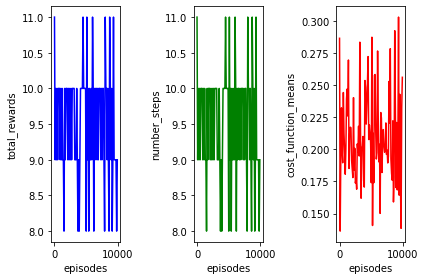

In [13]:
for i in range(10000):
    agent.start_episode(DISCOUNT_FACTOR, LEARNING_RATE, 1)
    if i % 100 == 0:
        total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0, render=False, optimize=False)
        print(mean_cost_function)
        total_rewards.append(total_reward)
        number_steps.append(steps)
        cost_function_means.append(mean_cost_function)
        train_episode_indexes.append(i)
agent.save('saves/data1.nn')
plot_metrics()

evaluation

train 1 000 (with %10 evaluation)

evaluation

train 9 000 - 10 000 (with %90 evaluation)

evaluation

train 90 000 - 100 000

evaluation

train 900 000 - 1 000 0000

evaluation